In [55]:
import torch
import torchvision.models as models
from torchvision import transforms
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
from torchvision.models import vgg11
from sklearn.metrics import precision_score, recall_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [87]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [71]:
model2 = models.vgg11(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

Removing the classification layer from model 2, and extract features:

In [72]:
model2.classifier = nn.Identity()
model2.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [73]:
def extract_features(model, dataloader):
    model.eval()
    features = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs)

    features = torch.cat(features)
    return features

Model 2 on Dataset 2

In [75]:
data2_path = "/content/drive/MyDrive/Dataset_Project/Data2/Dataset 2/Prostate Cancer"

dataset2 = datasets.ImageFolder(data2_path, transform=transform)

dataloader2 = DataLoader(dataset2, batch_size=32)

features2 = extract_features(model2, dataloader2)

In [76]:
all_features = []
all_labels = []

with torch.no_grad():
    for images, labels in dataloader2:
        images, labels = images.to(device), labels.to(device)
        outputs = model2.features(images)
        outputs = model2.avgpool(outputs)
        outputs = torch.flatten(outputs, 1)
        all_features.append(outputs)
        all_labels.append(labels)
all_features = torch.cat(all_features, dim=0).cpu().numpy()
all_labels = torch.cat(all_labels, dim=0).cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_features)

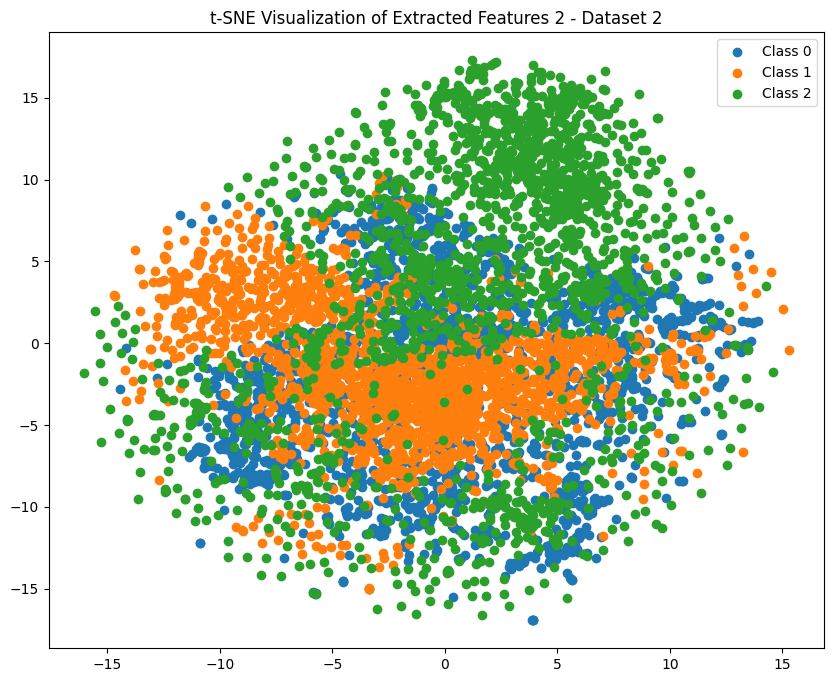

In [77]:
plt.figure(figsize=(10, 8))
for i in range(len(dataset2.classes)):
    plt.scatter(tsne_result[all_labels == i, 0], tsne_result[all_labels == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of Extracted Features 2 - Dataset 2')
plt.legend()
plt.show()

Applying Model 2 On Dataset 3

In [84]:
data3_path = "/content/drive/MyDrive/Dataset_Project/Data3/Dataset 3/Animal Faces"

dataset3 = datasets.ImageFolder(data3_path, transform=transform)

dataloader3 = DataLoader(dataset3, batch_size=32)

features3 = extract_features(model2, dataloader3)

In [85]:
all_features2 = []
all_labels2 = []

with torch.no_grad():
    for images, labels in dataloader3:
        images, labels = images.to(device), labels.to(device)
        outputs = model2.features(images)
        outputs = model2.avgpool(outputs)
        outputs = torch.flatten(outputs, 1)
        all_features2.append(outputs)
        all_labels2.append(labels)
all_features2 = torch.cat(all_features2, dim=0).cpu().numpy()
all_labels2 = torch.cat(all_labels2, dim=0).cpu().numpy()
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_features2)

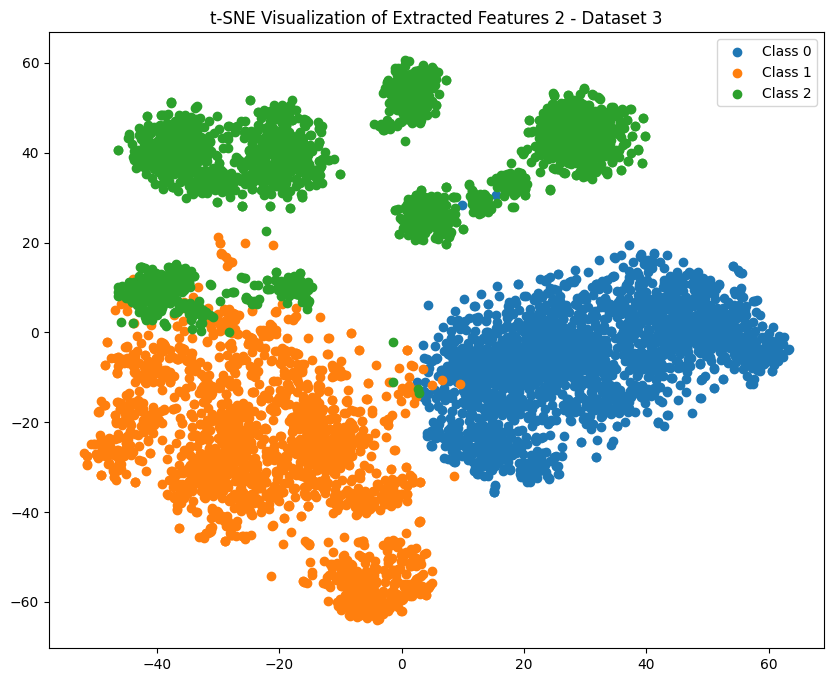

In [86]:
plt.figure(figsize=(10, 8))
for i in range(len(dataset3.classes)):
    plt.scatter(tsne_result[all_labels2 == i, 0], tsne_result[all_labels2 == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of Extracted Features 2 - Dataset 3')
plt.legend()
plt.show()